In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cust = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name = 'Data', index_col = 'ID')

In [3]:
cust.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
cust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [5]:
cust.shape

(5000, 13)

### Distribution of the Target Variable

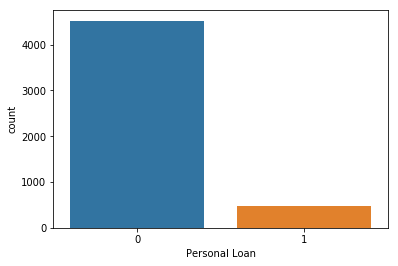

In [6]:
sns.countplot('Personal Loan', data = cust)

###### We can infer that we are dealing with a class imbalance problem as cutomers who have not opted for loan are dominating the sample space.

### Distribution of the Continuous Features in the dataset

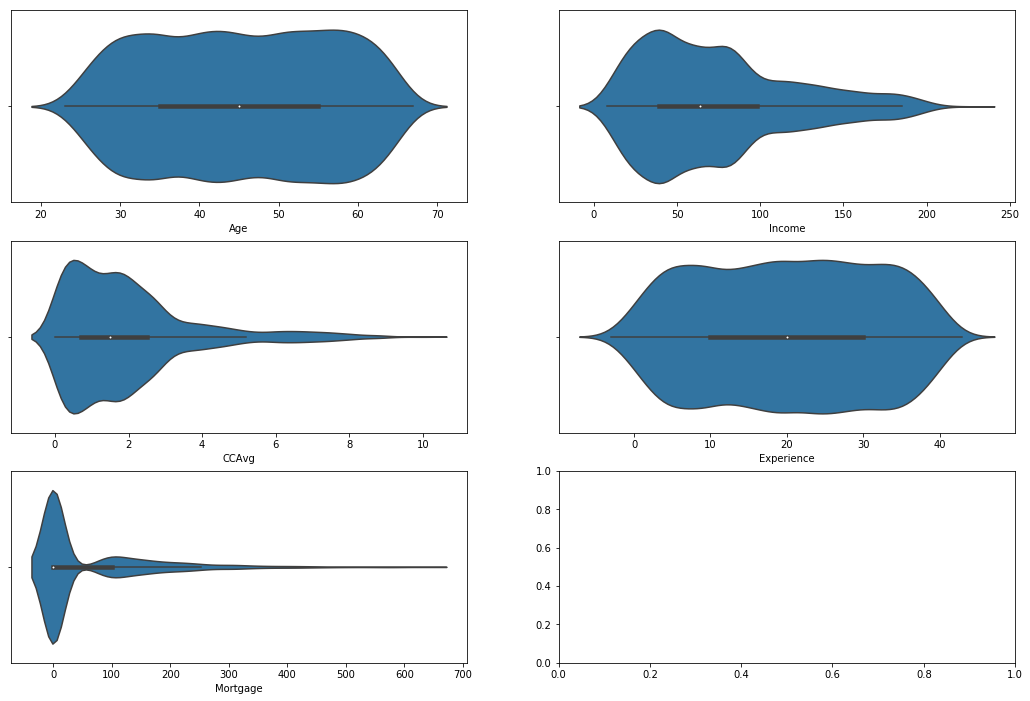

In [7]:
continuous = ['Age','Income','CCAvg','Experience','Mortgage']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for col, ax in zip(continuous[0:], axs.ravel()):
    sns.violinplot(x=col, data=cust, ax=ax)


###### Some obeservations that can be drawn on the individual predictor variables are as follows: -
1. Sample space of customers is spread in the range of 30 to 60 years with mean age at 45.
2. Most of the customer's income lies in a range of 40K to 100K.
3. Avg. spending on credit cards per month ranges from 1K and 3K for the customers in the sample.
4. Years of professional experience varies from 10 to 30 for majority of the customers.
5. For a lot of customers value of house mortgage lies between 0 and 100K


### Distribution of the Categorical Features in the dataset

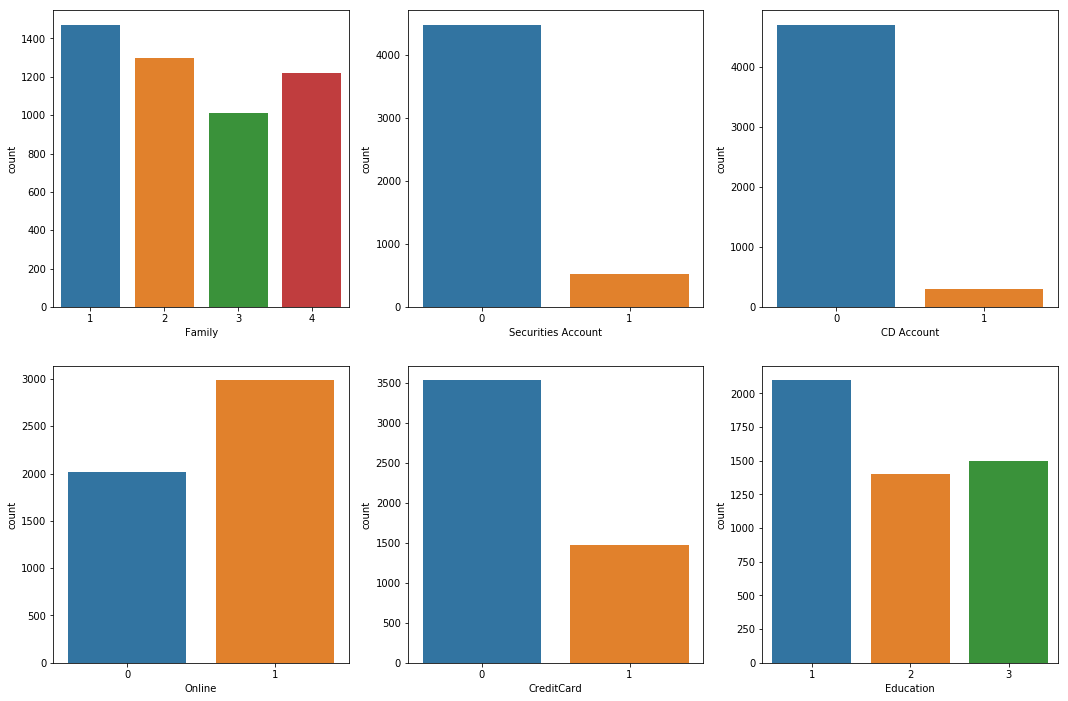

In [8]:
categorical = [ 'Family', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Education']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical[0:], axs.ravel()):
    sns.countplot(x=col, data=cust, ax=ax)

###### Some observations that can be drawn on the individual predictor variables are as follows: -
1. Family size is 1 for majority of customers followed by 2, 4 and 3.
2. Very less customers have opted for a security account.
3. Very less customers have opted for a CD account.
4. Sample has large numbers of customers with online account w.r.t those who don't have.
5. Around 1500 customers in the dataset of 5000 customers have credit cards.
6. Almost 40% of the customers of the bank are under graduate. 

### Understanding how the combination of Features interact with the Target variable.

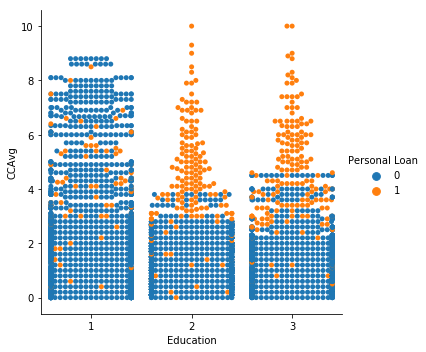

In [9]:
sns.catplot(x="Education", y="CCAvg", hue = 'Personal Loan', kind="swarm", data=cust)

###### We can infer that customers who have higher education level than undergraduates and have high avg. spending on credit cards per month are more likely to take a Personal Loan.

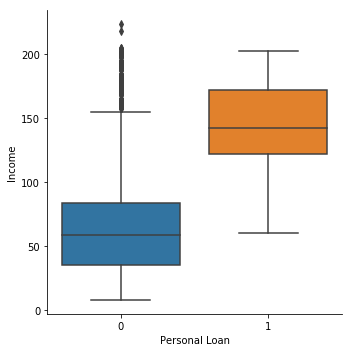

In [10]:
sns.catplot(x="Personal Loan", y="Income", kind="box", data=cust)

###### Customers with annual income in a range of 125K to 175K have a higher chance of taking a Personal loan.

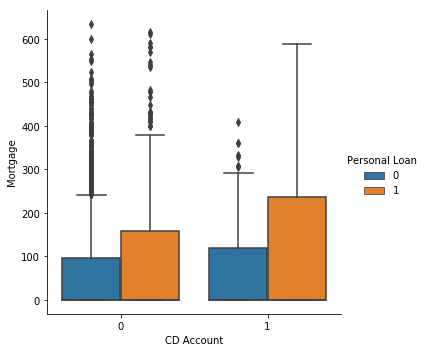

In [11]:
sns.catplot(x="CD Account", y="Mortgage", hue = 'Personal Loan', kind="box", data=cust)

###### There is only a very little effect of a customer having a CD account and a higher chance of taking a loan. However, CD account and Mortgage together does not show any likelihood of a person taking a personal loan.

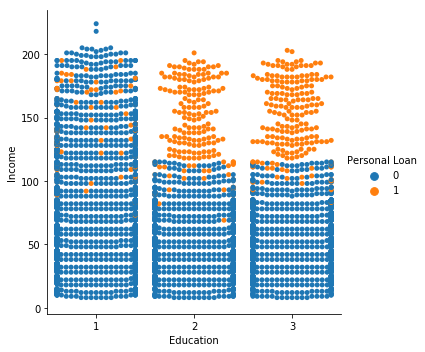

In [12]:
sns.catplot(x="Education", y="Income", hue = 'Personal Loan', kind="swarm", data=cust)

###### We can see that customers who have higher education level than undergraduates have comparatively low Annual income w.r.t undergraduates (we can certainly say that the sample data is biased and is not representative of the actual population). We can also observe that customers with higher education and high income have high chances of taking a personal loan.

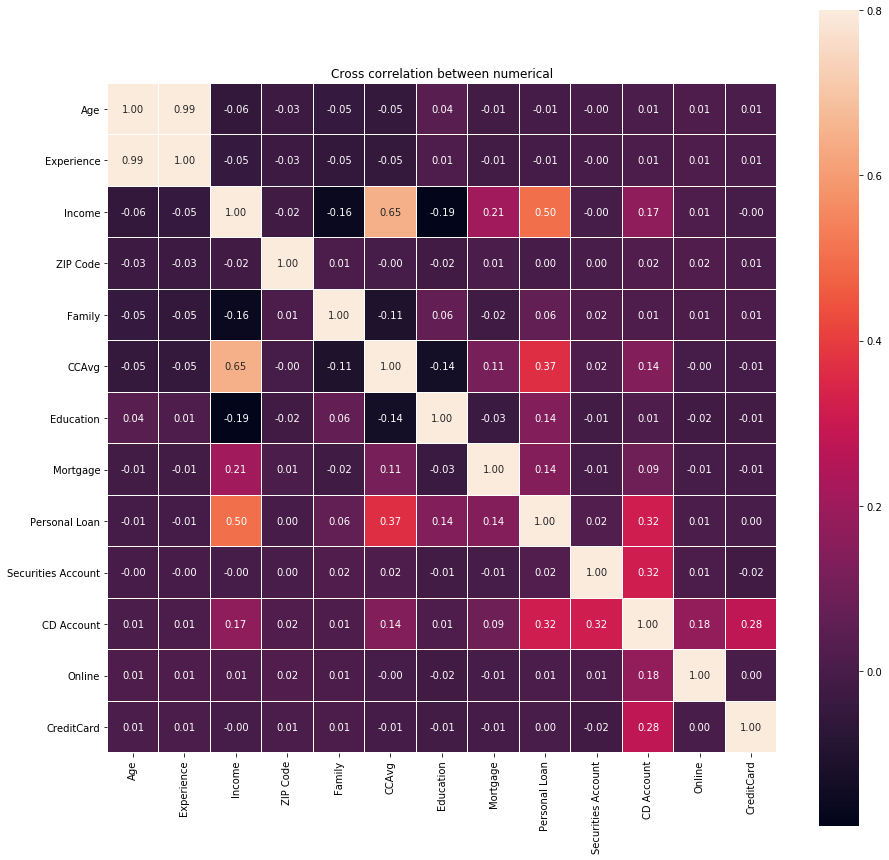

In [13]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cust.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

###### From the above HeatMap we can infer the following : -
1. Age and Experience are highly correlated.
2. Income and Average spending on credit card have positive correlation.

###### Attributes which have stronger relationship with Personal Loan -
1. Income
2. CCAvg

###### Attributes which have some relationship with Personal Loan -
1. CD Account
2. Education
3. Mortgage

In [14]:
cust[cust['Experience'] < 0].count()

Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

##### 52 cutomers have experience as negative in the data.

In [15]:

cust[cust['Experience'] < 0]['Personal Loan'].sum()

0

##### Customers with negative experience have not opted for personal loan

### Data Preparation for modelling
1. Removing Experience column because of high correlation factor.
2. For training data keep columns Income, CCAvg, CD Account, Education, Mortgage and Family as they have certain level of correlation with the target variable i.e Personal Loan.
3. Dropping all rows with negative experience as none of those customers have taken loan in the past.
4. And finally, separating the predictor variables and the target variable.

In [16]:
to_drop = ['Age','ZIP Code','CreditCard','Personal Loan']

In [17]:
cust1 = cust[cust.Experience >= 0]
X = cust1.drop(to_drop, axis=1)
Y = cust1['Personal Loan']

In [18]:
X.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online
ID,,,,,,,,,
1,1,49,4,1.6,1,0,1,0,0
2,19,34,3,1.5,1,0,1,0,0
3,15,11,1,1.0,1,0,0,0,0
4,9,100,1,2.7,2,0,0,0,0
5,8,45,4,1.0,2,0,0,0,0


### Split data into training and test data

In [19]:
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=0)

### Defining function to train different models and print accuracy and confusion matrix

In [20]:
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print('Accuracy Score: ',round(accuracy_score(labels_test,pred)*100,2),'%',sep='')
    rec = round(cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]),2)
    print("The recall for this model is :",rec)
    fig= plt.figure(figsize=(6,3))# to plot the graph
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,fmt = '.0f',linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

### Using Logistic Regression algorithm

Accuracy Score: 95.08%
The recall for this model is : 0.61


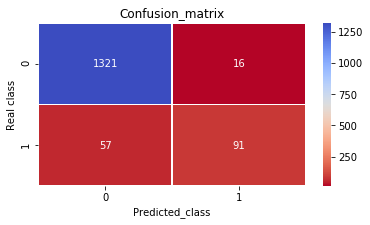


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1337
          1       0.85      0.61      0.71       148

avg / total       0.95      0.95      0.95      1485



In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
model(clf, X_train, X_test, y_train, y_test)

### Using Naive Bayes algorithm

Accuracy Score: 88.89%
The recall for this model is : 0.59


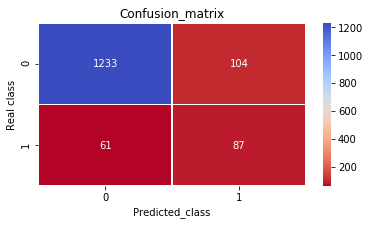


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.92      0.94      1337
          1       0.46      0.59      0.51       148

avg / total       0.90      0.89      0.90      1485



In [22]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
model(clf, X_train, X_test, y_train, y_test)

### Using KNN algorithm

Accuracy Score: 90.17%
The recall for this model is : 0.39


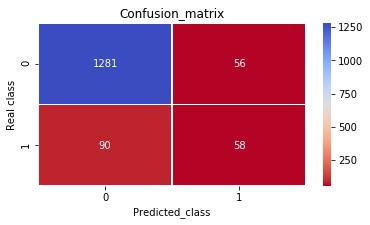


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1337
          1       0.51      0.39      0.44       148

avg / total       0.89      0.90      0.90      1485



In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 3 ,metric='euclidean')
model(clf, X_train, X_test, y_train, y_test)

### Using Support vector machine algorithm

Accuracy Score: 95.29%
The recall for this model is : 0.63


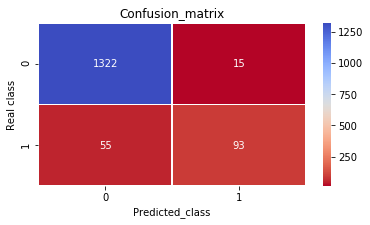


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1337
          1       0.86      0.63      0.73       148

avg / total       0.95      0.95      0.95      1485



In [24]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear', C = 0.1)
model(clf, X_train, X_test, y_train, y_test)

### Compare performances of the above algorithms:-
As this is a classic example of a class imbalance problem therfore just looking at the accuracy will not be enough.
1. Of all the algorithms used Gaussian Naive bayes accuracy is 89% with a recall of 59%.
2. KNN algorithm has an accuracy of 90%. However, recall (customer actually takes personal when predicted he will take) is 39% which is not good as it does not fully meet our purpose.
3. Logistic Regression has an accuracy of 95.08%. Also, the recall (customer actually takes personal when predicted he will take) is 61% which is better than both Gaussian and KNN models.
4. Support Vector Machine however, on the other end has accuracy of 95.29% which is good and also has a recall of 63% which is way higher than other models. 

#### To conclude, based on the accuracy and the recall rate the Support Vector Machine classifier looks to be best as compared to other models.